# Ссылка на датасет

https://www.kaggle.com/datasets/thedevastator/books-sales-and-ratings

# Анализ распределений данных

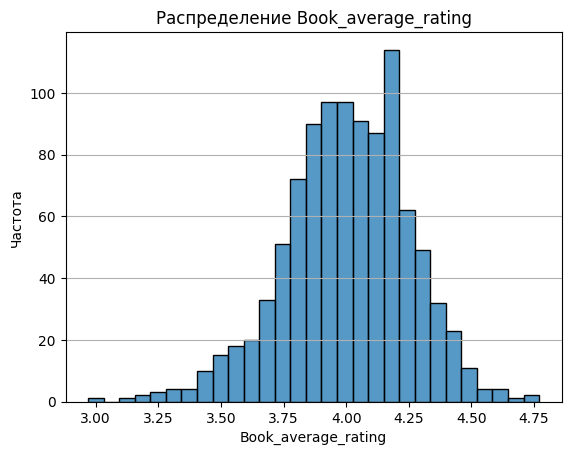

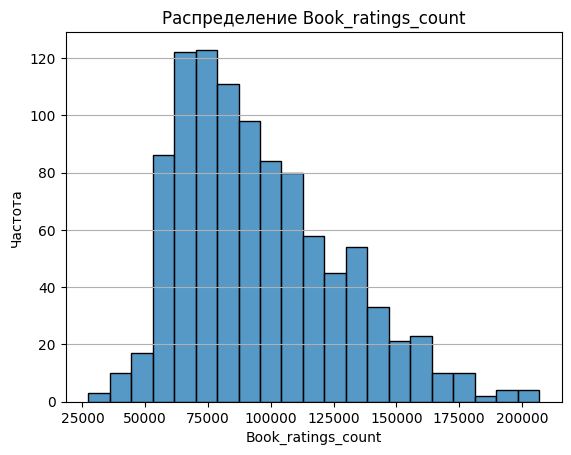

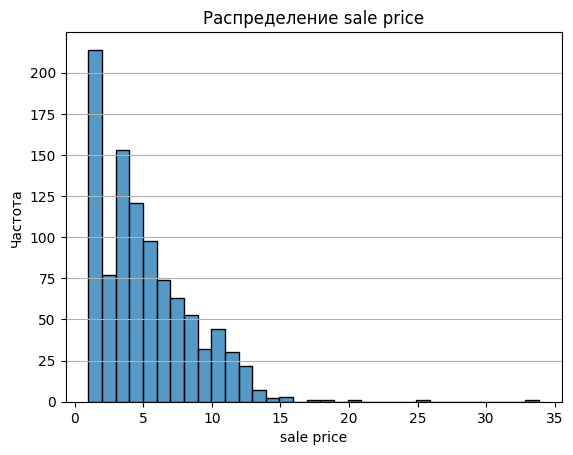

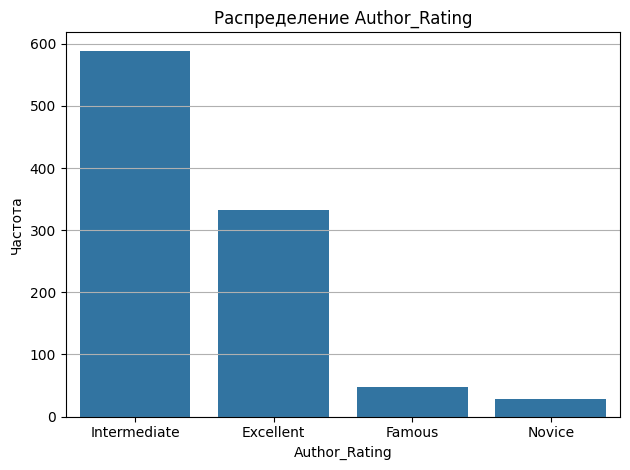

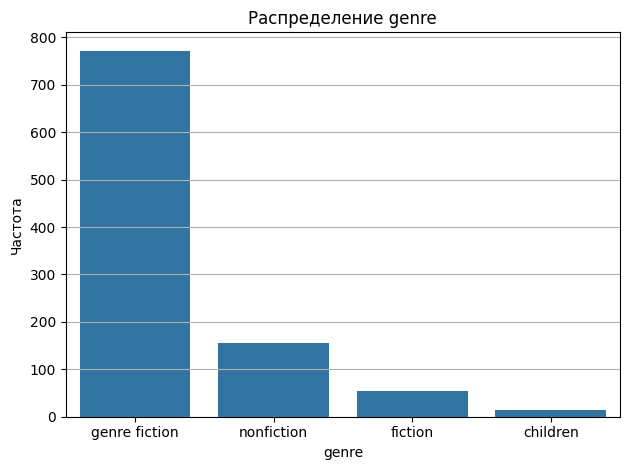

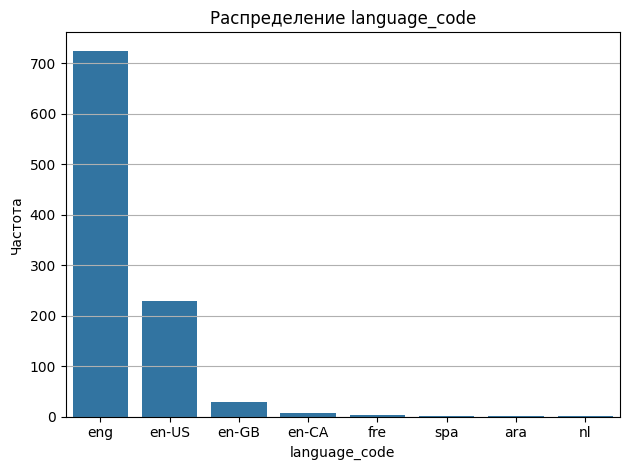

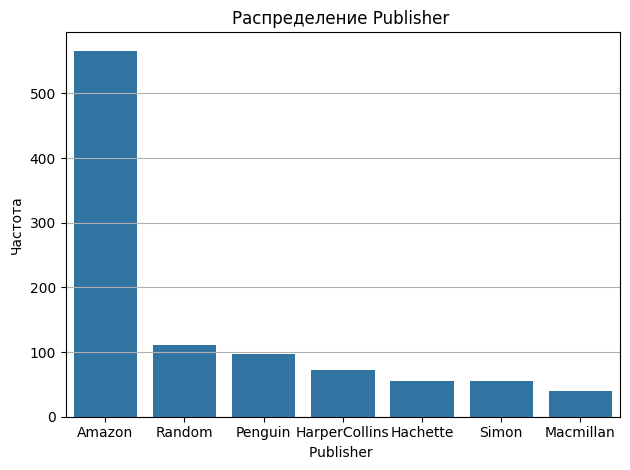

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('Books_Data_Clean.csv')
df = df.dropna()

columns = ['Book_average_rating', 'Book_ratings_count', 'sale price']
categorical_columns = ['Author_Rating', 'genre', 'language_code', 'Publisher ']

for column in columns:
    sns.histplot(data=df, x=column)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(axis='y')
    plt.show()

df['Publisher '] = df['Publisher '].apply(lambda x: str(x).split()[0])
for column in categorical_columns:
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Анализ связи между рейтингом автора и рейтингом книги

Корреляция Спирмена: 0.72, p-value: 0.0000


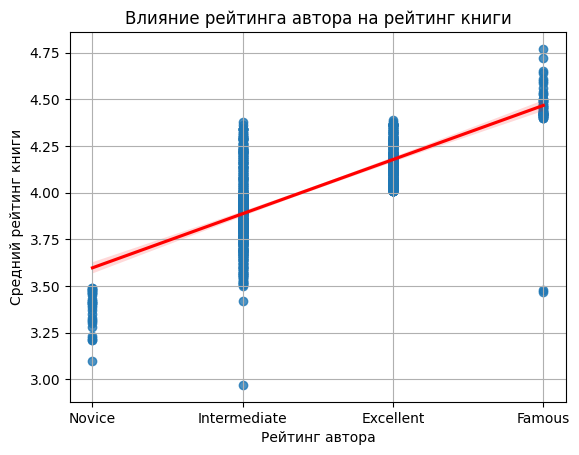

In [ ]:
from scipy.stats import spearmanr


df['Author_Rating_Encoded'] = df['Author_Rating'].map({'Novice': 1, 'Intermediate': 2, 'Excellent': 3, 'Famous': 4})

spearman = spearmanr(df['Author_Rating_Encoded'], df['Book_average_rating'])
print(f'Корреляция Спирмена: {spearman.correlation:.02f}, p-value: {spearman.pvalue:.04f}')

sns.regplot(data=df, x='Author_Rating_Encoded', y='Book_average_rating', line_kws={'color': 'red'})
plt.title('Влияние рейтинга автора на рейтинг книги')
plt.xlabel('Рейтинг автора')
plt.ylabel('Средний рейтинг книги')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Novice', 'Intermediate', 'Excellent', 'Famous'])
plt.grid()
plt.show()

# Анализ связи между количеством отзывов и средним рейтингом книги

Корреляция Пирсона: 0.10, p-value: 0.0016


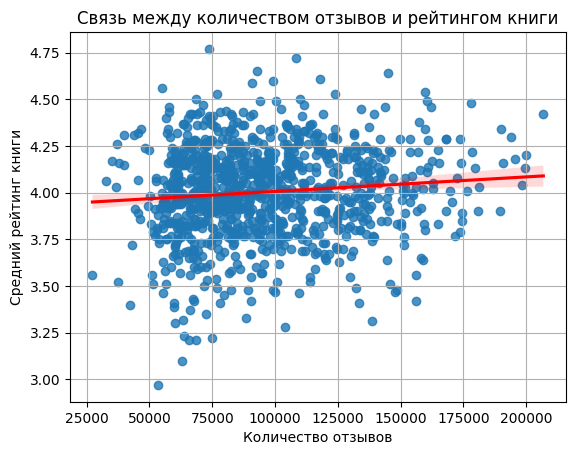

In [ ]:
from scipy.stats import pearsonr


df['Book_ratings_count'] = pd.to_numeric(df['Book_ratings_count'])
df['Book_average_rating'] = pd.to_numeric(df['Book_average_rating'])

pearson = pearsonr(df['Book_ratings_count'], df['Book_average_rating'])
print(f'Корреляция Пирсона: {pearson.correlation:.2f}, p-value: {pearson.pvalue:.4f}')

sns.regplot(data=df, x='Book_ratings_count', y='Book_average_rating', line_kws={'color': 'red'})
plt.title('Связь между количеством отзывов и рейтингом книги')
plt.xlabel('Количество отзывов')
plt.ylabel('Средний рейтинг книги')
plt.grid()
plt.show()

# Анализ влияния жанра книги на её средний рейтинг

Дисперсионный анализ: 0.87, p-value = 0.4551


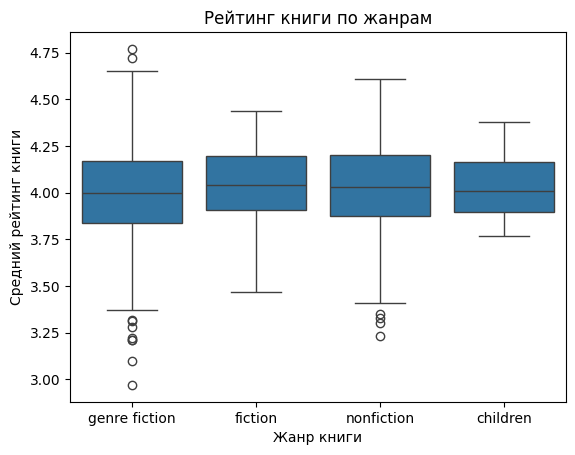

In [ ]:
from scipy.stats import f_oneway


genres = [df[df['genre'] == genre]['Book_average_rating'] for genre in df['genre'].unique()]

anova_result = f_oneway(*genres)

print(f'Дисперсионный анализ: {anova_result[0]:.2f}, p-value = {anova_result[1]:.4f}')

sns.boxplot(data=df, x='genre', y='Book_average_rating')
plt.title('Рейтинг книги по жанрам')
plt.xlabel('Жанр книги')
plt.ylabel('Средний рейтинг книги')
plt.show()

# Анализ влияния языка книги на её средний рейтинг

Дисперсионный анализ: 1.50, p-value = 0.1643


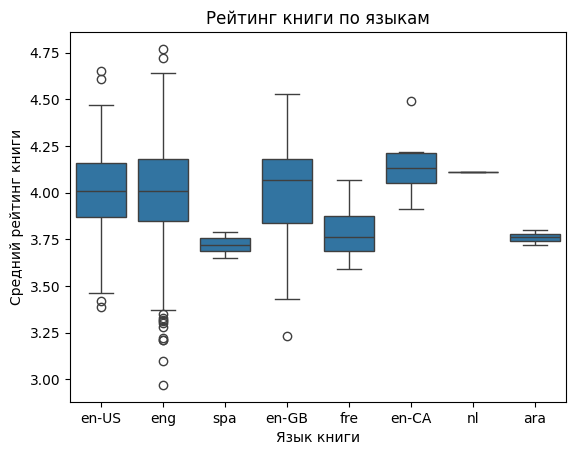

In [ ]:
languages = [df[df['language_code'] == language]['Book_average_rating'] for language in df['language_code'].unique()]

anova_result = f_oneway(*languages)

print(f'Дисперсионный анализ: {anova_result[0]:.2f}, p-value = {anova_result[1]:.4f}')

sns.boxplot(data=df, x='language_code', y='Book_average_rating')
plt.title('Рейтинг книги по языкам')
plt.xlabel('Язык книги')
plt.ylabel('Средний рейтинг книги')
plt.show()


# Анализ влияния издателя книги на её средний рейтинг

Дисперсионный анализ: 1.36, p-value = 0.2299


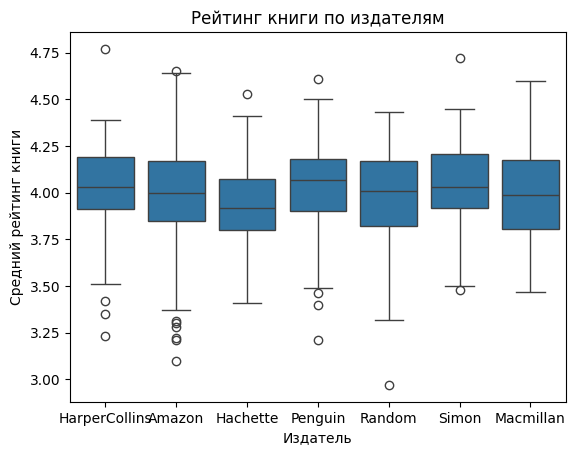

In [ ]:
publishers = [df[df['Publisher '] == publisher]['Book_average_rating'] for publisher in df['Publisher '].unique()]

anova_result = f_oneway(*publishers)

print(f'Дисперсионный анализ: {anova_result[0]:.2f}, p-value = {anova_result[1]:.4f}')

sns.boxplot(data=df, x='Publisher ', y='Book_average_rating')
plt.title('Рейтинг книги по издателям')
plt.xlabel('Издатель')
plt.ylabel('Средний рейтинг книги')
plt.show()

# Анализ связи между количеством проданных книг и их рейтингом

Коэффициент корреляции Пирсона: -0.00, p-value: 0.9932


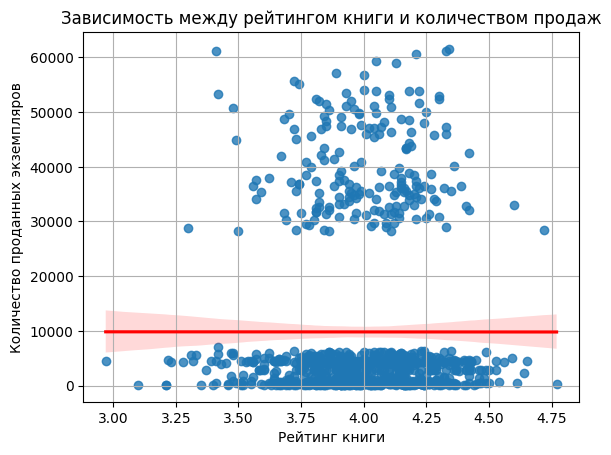

In [ ]:
pearson = pearsonr(df['Book_average_rating'], df['units sold'])

print(f'Коэффициент корреляции Пирсона: {pearson[0]:.2f}, p-value: {pearson[1]:.4f}')

sns.regplot(data=df, x='Book_average_rating', y='units sold', line_kws={'color': 'red'})
plt.title('Зависимость между рейтингом книги и количеством продаж')
plt.xlabel('Рейтинг книги')
plt.ylabel('Количество проданных экземпляров')
plt.grid()
plt.show()


# Анализ связи между количеством продаж книг и рейтингом автора

Коэффициент корреляции Спирмена: 0.19, p-value: 0.0000


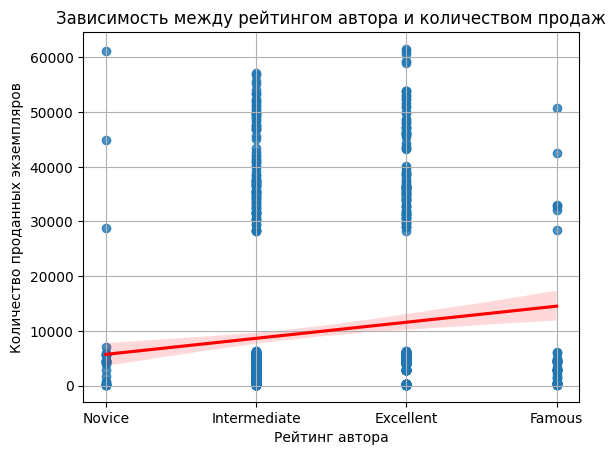

In [ ]:
spearman = spearmanr(df['Author_Rating_Encoded'], df['units sold'])

print(f'Коэффициент корреляции Спирмена: {spearman[0]:.2f}, p-value: {spearman[1]:.4f}')

sns.regplot(data=df, x='Author_Rating_Encoded', y='units sold', line_kws={'color': 'red'})
plt.title('Зависимость между рейтингом автора и количеством продаж')
plt.xlabel('Рейтинг автора')
plt.ylabel('Количество проданных экземпляров')
plt.xticks(ticks=[1, 2, 3, 4], labels=['Novice', 'Intermediate', 'Excellent', 'Famous'])
plt.grid()
plt.show()


# Анализ связи между количеством проданных книг и их жанром

Дисперсионный анализ: F-statistic = 2.34, p-value = 0.0717


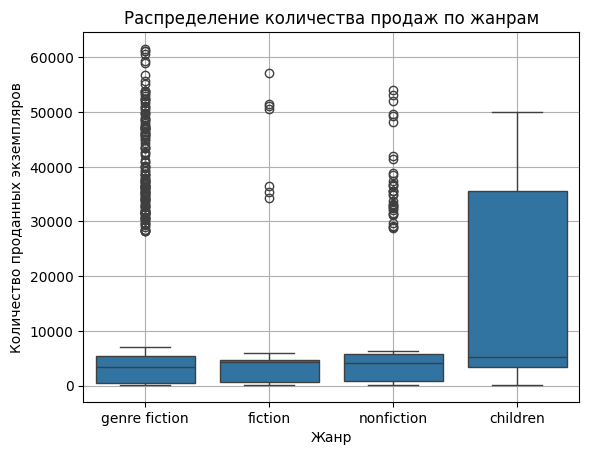

In [ ]:
genres = [df[df['genre'] == genre]['units sold'] for genre in df['genre'].unique()]

anova_result = f_oneway(*genres)

print(f'Дисперсионный анализ: F-statistic = {anova_result[0]:.2f}, p-value = {anova_result[1]:.4f}')

sns.boxplot(x='genre', y='units sold', data=df)
plt.title('Распределение количества продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных экземпляров')
plt.grid()
plt.show()


# Анализ связи между количеством проданных книг и их языком

Дисперсионный анализ: F-statistic = 0.59, p-value = 0.7619


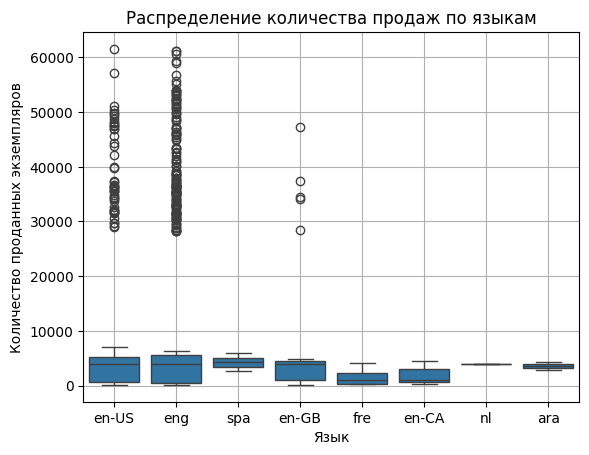

In [ ]:
languages = [df[df['language_code'] == language]['units sold'] for language in df['language_code'].unique()]

anova_result = f_oneway(*languages)

print(f'Дисперсионный анализ: F-statistic = {anova_result[0]:.2f}, p-value = {anova_result[1]:.4f}')

sns.boxplot(x='language_code', y='units sold', data=df)
plt.title('Распределение количества продаж по языкам')
plt.xlabel('Язык')
plt.ylabel('Количество проданных экземпляров')
plt.grid()
plt.show()

# Анализ связи между количеством проданных книг и их издателем

Дисперсионный анализ: F-statistic = 0.67, p-value = 0.6761


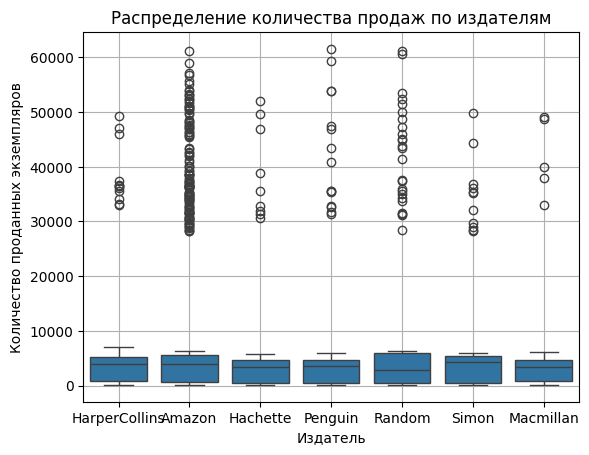

In [ ]:
publishers = [df[df['Publisher '] == publisher]['units sold'] for publisher in df['Publisher '].unique()]

anova_result = f_oneway(*publishers)

print(f'Дисперсионный анализ: F-statistic = {anova_result[0]:.2f}, p-value = {anova_result[1]:.4f}')

df['Publisher '] = df['Publisher '].apply(lambda x: str(x).split()[0])
sns.boxplot(x='Publisher ', y='units sold', data=df)
plt.title('Распределение количества продаж по издателям')
plt.xlabel('Издатель')
plt.ylabel('Количество проданных экземпляров')
plt.grid()
plt.show()